In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [20]:
sanger = pd.read_csv("../../data/drug/drug_final_processed_eg_id.csv.gz",low_memory=False)

In [22]:
sanger = sanger[['cell_line_name','drug_id','drug_name','ln_IC50']]

In [23]:
sanger['drug_name'] = sanger['drug_name'].str.lower()

<ipython-input-23-3bb793823d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanger['drug_name'] = sanger['drug_name'].str.lower()


In [10]:
prism = pd.read_csv("../../data/ccle/drug_all_ccle_secondary_processed_auc.csv")

In [41]:
prism_ic50 = pd.read_csv("../../data/ccle/drug_all_ccle_secondary_processed_ic50.csv")

## with AUC

In [49]:
combined = pd.merge(sanger,prism, on=['cell_line_name','drug_name'])

In [50]:
corrs = []
for drug_id in combined['drug_id_x'].unique():
    tmp = combined[combined['drug_id_x']==drug_id]
    r,pval=pearsonr(tmp['ln_IC50'], tmp['auc'])
    corrs.append(r)

In [51]:
print(len(corrs))

186


In [32]:
np.median(corrs)

0.23817136509326342

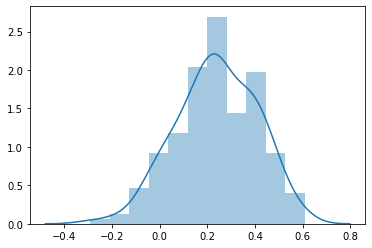

In [30]:
sns.distplot(corrs)

## with IC50

In [42]:
combined = pd.merge(sanger,prism_ic50, on=['cell_line_name','drug_name'])

In [45]:
corrs = []
for drug_id in combined['drug_id_x'].unique():
    tmp = combined[combined['drug_id_x']==drug_id]
    r,pval=pearsonr(tmp['ln_IC50'], tmp['ic50'])
    corrs.append(r)

In [46]:
np.median(corrs)

0.15474469779957836

In [47]:
print(len(corrs))

65


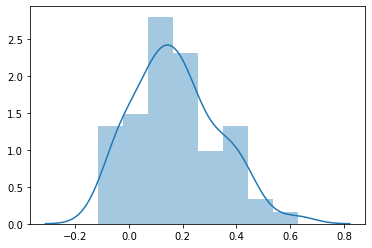

In [48]:
sns.distplot(corrs)